# Speech Q1 & Q3 (Combined)


In [22]:
# All the files wrt to this Jupyter Notebook , are present in data/ library and figuers are stored in /figures folder.


In [ ]:
# Required libraries 
import numpy as np
import audioread
import os 
from math import log 
import matplotlib.pyplot as plt 
import scipy
plt.style.use('seaborn-white')

# Scipy Specific Libraries. 
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft
from scipy.fftpack import ifft


In [2]:
#File address 

# sftp://niharika.v@ada.iiit.ac.in/home/niharika.v/Speech/data/H_MKB_frame.wav

dirAdd='data/'

file1=dirAdd+'H_MKB.wav'
file2=dirAdd+'niharika.wav'
file3=dirAdd+'H_MKB_frame.wav'
file4=dirAdd+'a_frame.wav'
file5=dirAdd+'k_frame.wav'

## Helper Function : Read File 
* Helps in displaying statistics of the file ,as well as values . 

In [3]:
#Reading the wav file and displaying stats. 
def readFile(filename,flag=True):
    if(flag):
        with audioread.audio_open(filename) as f:
            print('File Statistics ')
            print('File Name : ',filename.strip('.wav'))
            print('Number of Channels :', f.channels)
            print('Sample Rate : ',str(f.samplerate)+ ' Hz')
            print('Time Duration: ', str(f.duration)+' secs')
    #Get the data and Fs 
    Fs,data = wavfile.read(str(filename))
    return(Fs,data)
    

## Helper Function : timePlot
* Helps in displaying the waveform of the file , also saves the plot image in /figures folder. 

In [4]:
# Basic Time Plot. 
def timePlot(fileName):
    # Load the data and calculate the time of each sample
    Fs,data = wavfile.read(str(fileName))
    print(type(data))
    times = np.arange(len(data))/float(Fs)
    # Make the plot
    plt.figure(figsize=(20,10))
    plt.plot(data)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    # You can set the format by changing the extension
    name=fileName.strip('.wav')
    plt.savefig(str(name)+'_TA_plot.jpg', dpi=300, bbox_inches='tight')
    plt.title('Amplitude-Time Plot')
    plt.show()
    

## Helper Function : zeroCrossingRate 
* Helps in computing the zero crossing count in each file .  

In [12]:
# Zero Crossing Rate. 

def sign(x): 
    if(x>=0):
        return(1)
    return(-1)

def zeroCrossingRate(fileName):
    Fs,data=readFile(fileName,False)
    data=np.asarray(data)
    print(data.shape)
    signs             = np.sign(data)
    signs[signs == 0] = -1
    return len(np.where(np.diff(signs))[0])/len(data)


In [13]:
# Testing ZRC 
rate=zeroCrossingRate(file3)
print(rate)

(2451,)
0.041207670338637294


## Helper Function : logEnergy
* Helps in computing the averge log energy  =, as well as plotting the log plot. 

In [16]:
def logEnergy(fileName,flag=False):
    Fs,data=readFile(fileName,flag=False)
    ep=0.0001
    if(data.shape[0]==2):
        data=dt=data[:,0]
    #Compute FFT . 
    y=abs(data)
    N=len(y)
    y_conj= np.conj(y)
    tot_energy = abs(np.dot(y,y_conj))
    en= [y[i]**2 for i in range(len(y))]
    logen=[log(y[i]**2+0.000001) for i in range(len(y))]
    totalEnergy = 10*log(ep+(1/N)*sum(en))
    if(flag):
        t=np.linspace(0,N,N)
        fig=plt.figure(figsize=[15,5])
        plt.plot(t,logen)
    print('Total Energy of the Frame :',totalEnergy)

Total Energy of the Frame : 139.3403116686875


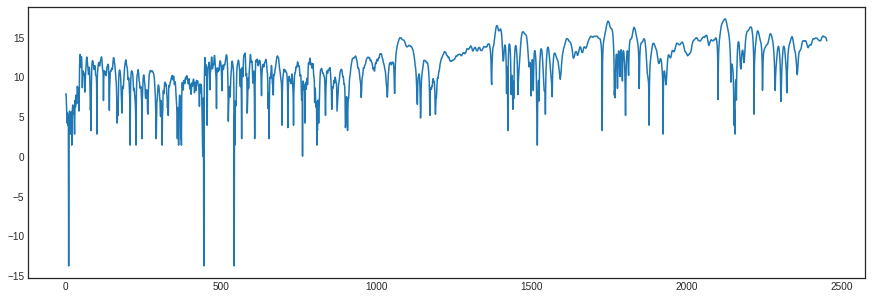

In [17]:
logEnergy(file3,True)

## Helper Function : Autocorellation 
* Helps in computing the autocorellation , and plots the graph .  

In [ ]:
# Autocorellation 
import matplotlib.pyplot as plot
def autoCorretion(fileName,flag=False):
    Fs,data=readFile(fileName,False)
    # Apply autocorr to the numpy data.
    data=np.asarray(data)
    print(data.shape)
    dt=data[:]
#     Note : Here only 100 samples are taken out for graphical purposes .
    dt=dt[0:100]
    corr=scipy.signal.correlate(dt,dt, mode='full', method='auto')
    if(flag):
        N=len(corr)
        t=np.linspace(0,N,N)
        fig=plt.figure(figsize=[15,5])
        plt.plot(t,corr)
        plt.grid()
        plt.title('Autocorelation Plot')

(2451,)


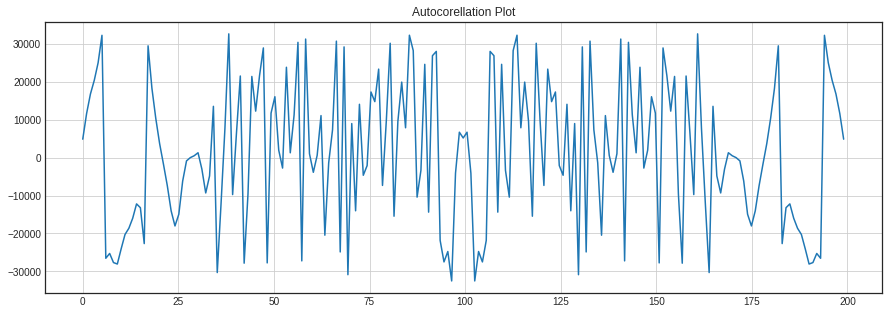

In [21]:
# Testing . 
autoCorretion(file3,True)